sources:
- [paper implements Stereo Correspondence](https://www.researchgate.net/publication/251949538_Sum_of_Absolute_Differences_algorithm_in_stereo_correspondence_problem_for_stereo_matching_in_computer_vision_application)
- [stereoBM docs](https://docs.opencv.org/3.2.0/d9/dba/classcv_1_1StereoBM.html#details)

Findings:
- sharing numpy array between processes [SharedArray](https://pypi.org/project/SharedArray/)

In [1]:
import os
import sys
sys.path.append(os.path.dirname(os.getcwd()))

import cv2
from os import path
from matplotlib import pyplot as plt
import numpy as np

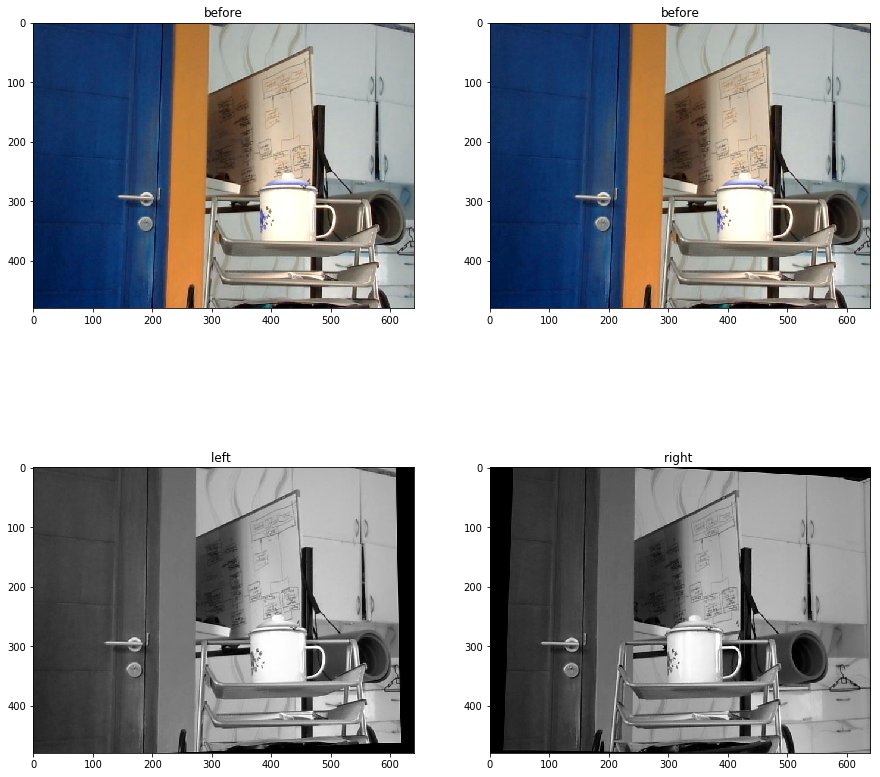

In [2]:
samples_dir = os.path.join('.', 'samples')
# Load image
left_img_path = os.path.join(samples_dir, 'stereo_img_1', 'left.jpg')
right_img_path = os.path.join(samples_dir, 'stereo_img_1', 'right.jpg')

left_img = cv2.imread(left_img_path)
right_img = cv2.imread(right_img_path)

left_gray = cv2.cvtColor(left_img, cv2.COLOR_BGR2GRAY)
right_gray = cv2.cvtColor(right_img, cv2.COLOR_BGR2GRAY)

# undistored and rectivy
import calibration
preset_path = os.path.join(os.path.dirname(os.getcwd()), 'calibration_preset')
left_gray, right_gray = calibration.calibrate_imgs(left_gray, right_gray, preset_path)

plt.figure(figsize=(15, 15))

plt.subplot(2,2,1)
plt.imshow(left_img)
plt.title('before')

plt.subplot(2,2,2)
plt.imshow(left_img,)
plt.title('before')

plt.subplot(2,2,3)
plt.imshow(left_gray, 'gray')
plt.title('left ')

plt.subplot(2,2,4)
plt.imshow(right_gray, 'gray')
plt.title('right ')


plt.show()


101 ms ± 5.91 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


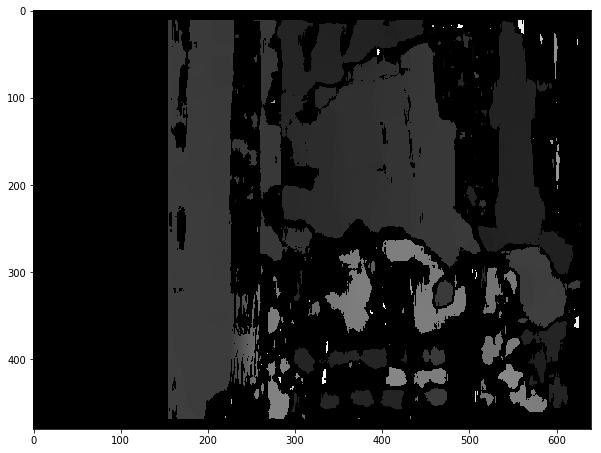

In [8]:
stereo = cv2.StereoBM_create(numDisparities=144, blockSize=25)
%timeit stereo.compute(left_gray, right_gray)
disparity1 = stereo.compute(left_gray, right_gray)
plt.figure(figsize=(10,10))
plt.imshow(disparity1, 'gray')

## StereoBM parameter benchmark

31.1 ms ± 779 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
28.5 ms ± 125 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
54.5 ms ± 2.12 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
54.8 ms ± 1.97 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
55.6 ms ± 73.6 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
98.8 ms ± 1.32 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
99.5 ms ± 1.87 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
98.6 ms ± 3.95 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
93.2 ms ± 227 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
94.3 ms ± 1.34 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


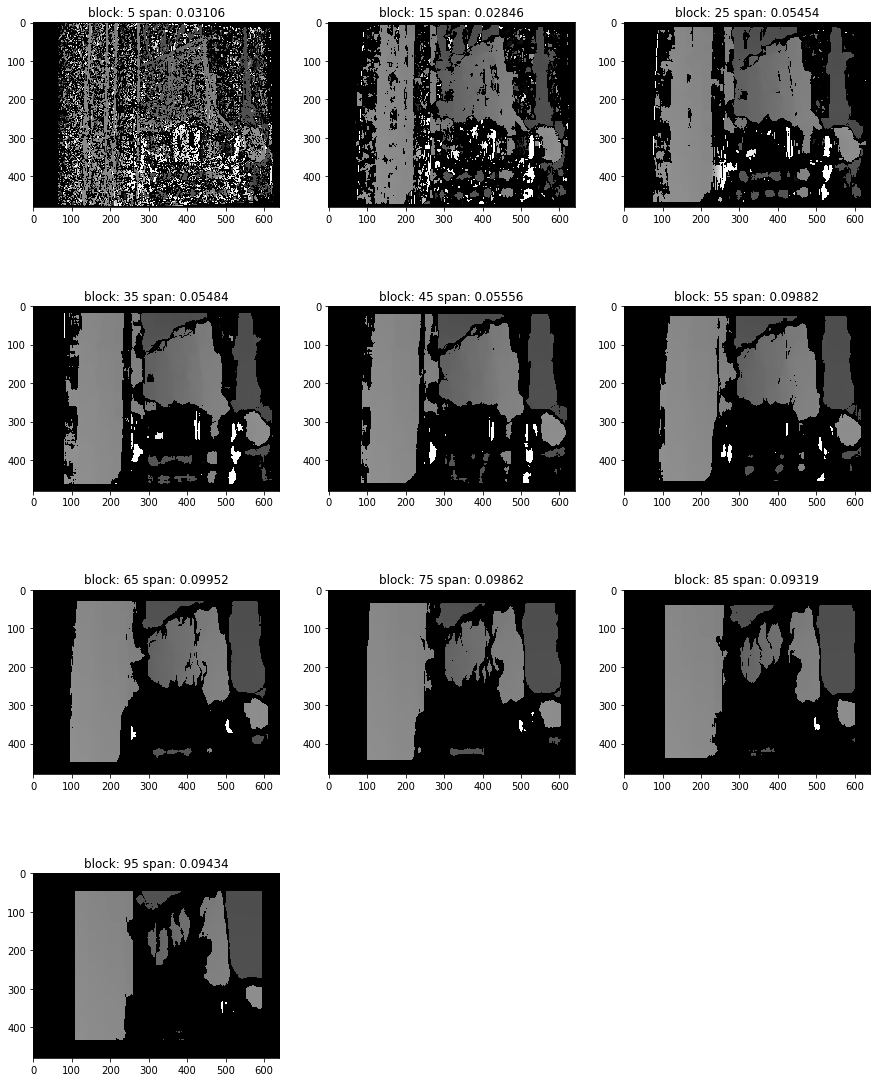

In [4]:
import time
img_list = []
time_list = []

# odd 5..255
block_num = np.arange(5, 100, 5)
block_num = block_num[block_num % 2 == 1]

for block_n in block_num:
  stereo = cv2.StereoBM_create(blockSize=block_n)
  time_span = %timeit -o -n 10 stereo.compute(left_gray, right_gray)
  disparity = stereo.compute(left_gray, right_gray)
  img_list.append(disparity)
  time_list.append(time_span)

index = 1
n_col = 3
n_row = round(block_num.shape[0]/n_col) + 1

plt.figure(figsize=(n_col * 5, n_row * 5))
for img, span, blok_n in zip(img_list, time_list, block_num):
  plt.subplot(n_row, n_col, index)
  plt.imshow(img, 'gray')
  title = 'block: {} span: {:0.5f}'.format(blok_n, span.average)
  plt.title('{}'.format(title))
  index += 1

plt.show()




36.7 ms ± 192 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
14 ms ± 135 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
23.1 ms ± 2.18 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
30.7 ms ± 154 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
38.9 ms ± 2.82 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
44.2 ms ± 105 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
52.3 ms ± 4.13 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
60.4 ms ± 2.51 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
79.8 ms ± 14.8 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
80.1 ms ± 10 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
77.9 ms ± 1.63 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
83.5 ms ± 6.49 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
84.8 ms ± 2.46 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
88.9 ms ± 2.22 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
94.2 ms ± 6.04

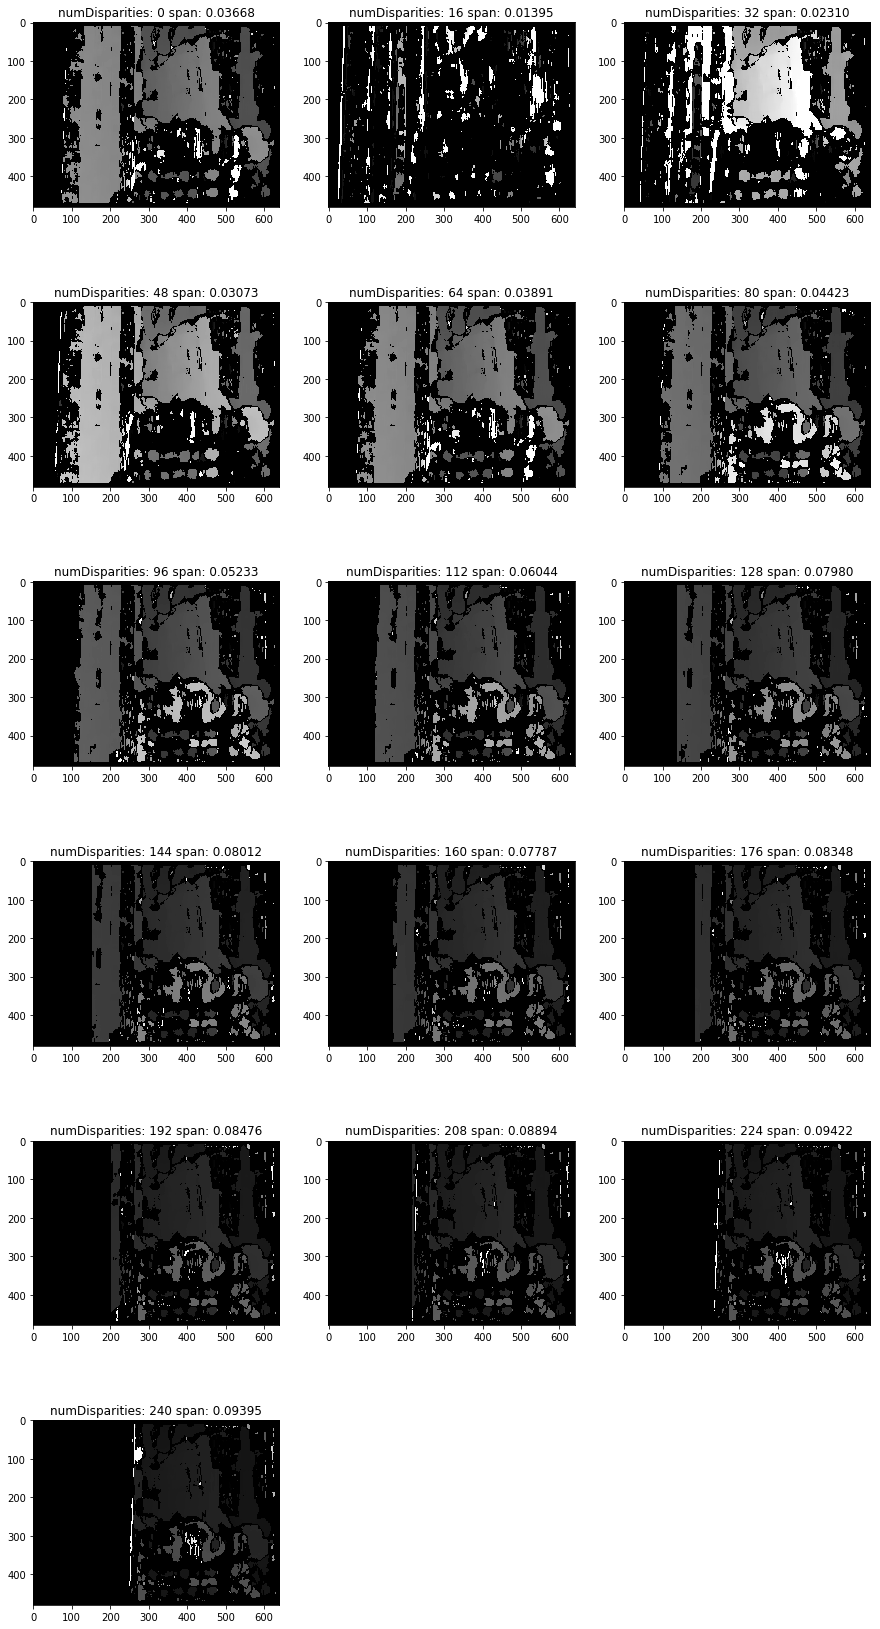

In [5]:
img_list = []
time_list = []

# odd 5..255
numDisparities = np.arange(0, 255, 16)

for n_disparity in numDisparities:
  stereo = cv2.StereoBM_create(numDisparities=n_disparity)
  time_span = %timeit -o -n 10 stereo.compute(left_gray, right_gray)
  disparity = stereo.compute(left_gray, right_gray)
  img_list.append(disparity)
  time_list.append(time_span)

index = 1
n_col = 3
n_row = round(numDisparities.shape[0]/n_col) + 1

plt.figure(figsize=(n_col * 5, n_row * 5))
for img, timeit_result, num_disparities in zip(img_list, time_list, numDisparities):
  plt.subplot(n_row, n_col, index)
  plt.imshow(img, 'gray')
  title = 'numDisparities: {} span: {:0.5f}'.format(num_disparities, timeit_result.average)
  plt.title('{}'.format(title))
  index += 1

plt.show()